# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**

    airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
    balcony — число балконов
    ceiling_height — высота потолков (м)
    cityCenters_nearest — расстояние до центра города (м)
    days_exposition — сколько дней было размещено объявление (от публикации до снятия)
    first_day_exposition — дата публикации
    floor — этаж
    floors_total — всего этажей в доме
    is_apartment — апартаменты (булев тип)
    kitchen_area — площадь кухни в квадратных метрах (м²)
    last_price — цена на момент снятия с публикации
    living_area — жилая площадь в квадратных метрах (м²)
    locality_name — название населённого пункта
    open_plan — свободная планировка (булев тип)
    parks_around3000 — число парков в радиусе 3 км
    parks_nearest — расстояние до ближайшего парка (м)
    ponds_around3000 — число водоёмов в радиусе 3 км
    ponds_nearest — расстояние до ближайшего водоёма (м)
    rooms — число комнат
    studio — квартира-студия (булев тип)
    total_area — общая площадь квартиры в квадратных метрах (м²)
    total_images — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

   total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1       

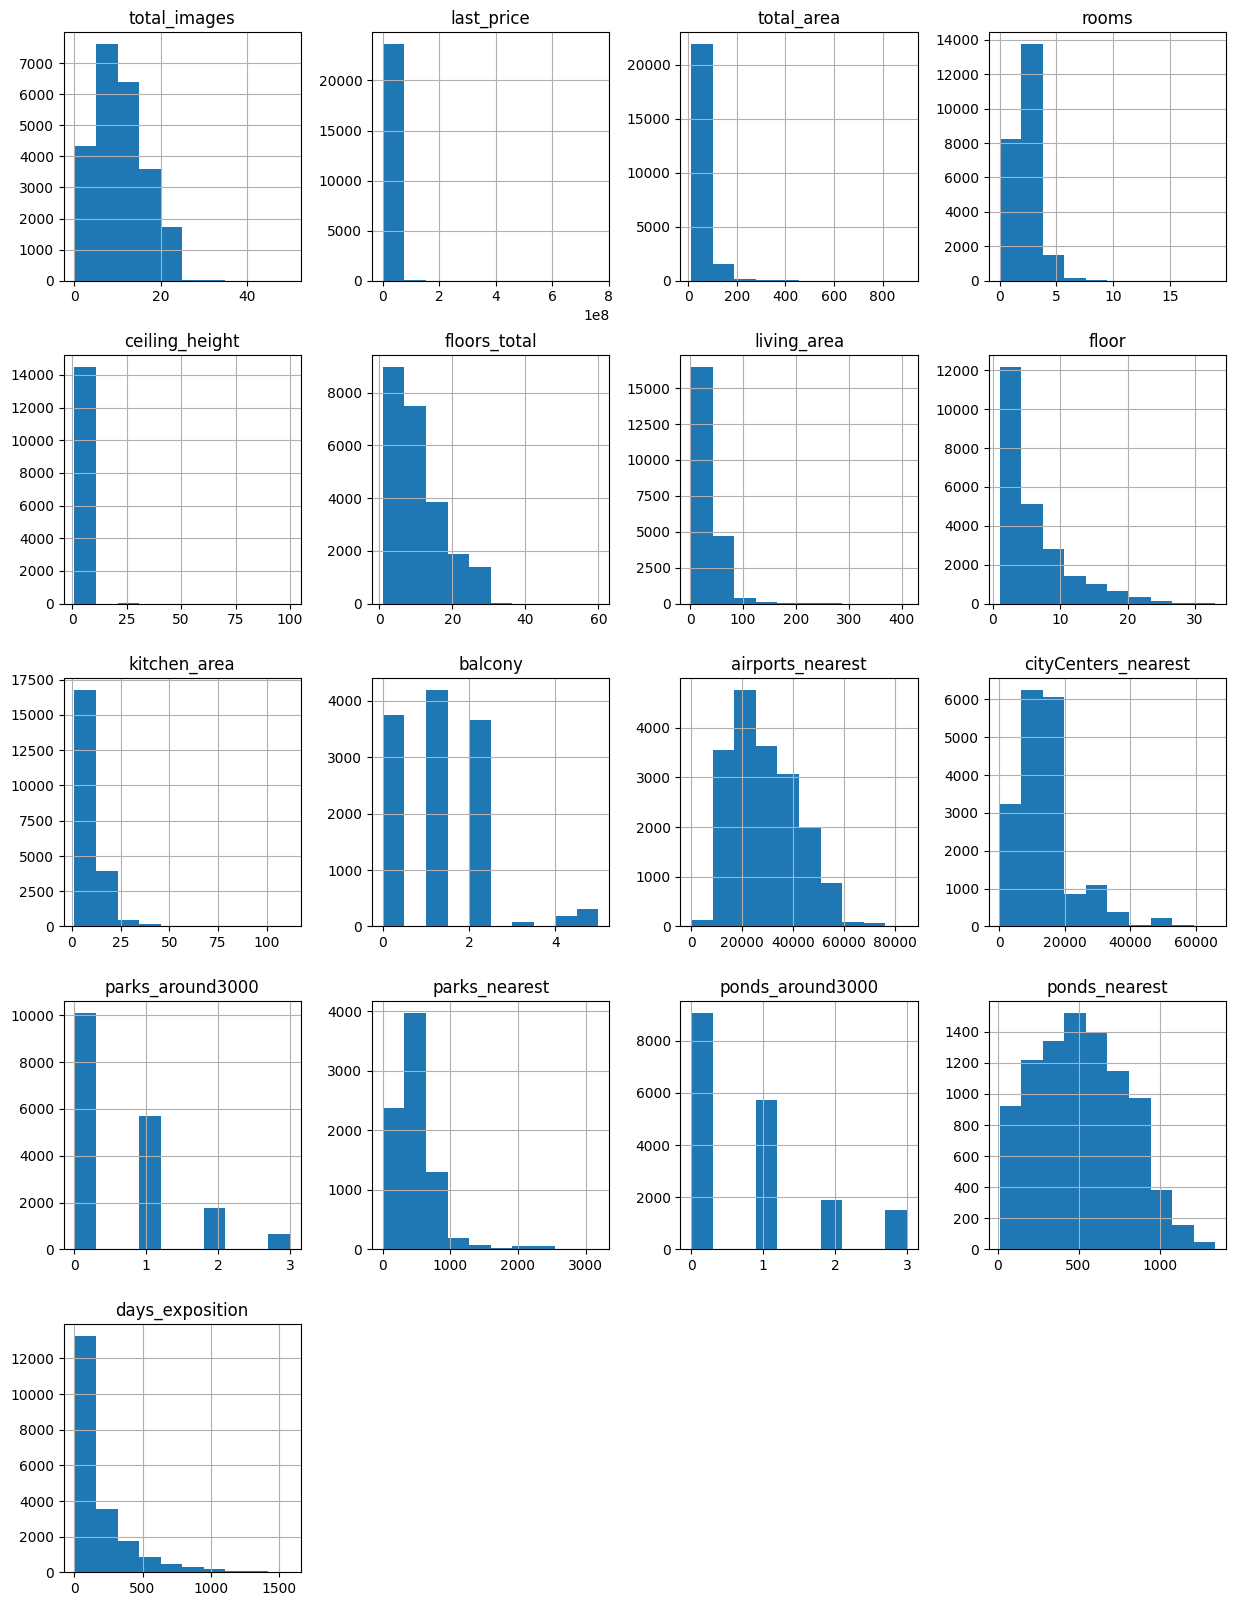

In [90]:
# просмотр первых 5 строк
print(data.head())

# просмотр общей информации файла
data.info()

#гистограммы для всех числовых столбцов
data.hist(figsize=(15, 20))
plt.show()

### Предобработка данных

#### При анализе данных были обнаружены пропуски в данных по разным столбцам

In [91]:
#определение пропусков в столбцах
print('До обработки \n', data.isna().sum(),'\n')

#Заменяем пустые значения в столбце is_apartment на False
data['is_apartment'] = data['is_apartment'].fillna(False)

#Заменяем пустые значения в столбце balcony на 0
data['balcony'] = data['balcony'].fillna(0)

#Заменяем пустые значения в столбце parks_around3000 на 0
data['parks_around3000'] = data['parks_around3000'].fillna(0)

#Заменяем пустые значения в столбце ponds_around3000 на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

До обработки 
 total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64 



In [92]:
#заменяем пустые значения в столбце living_area на отношение общей площади и отношение медиальных значений общей площади к жилой площади
data['living_area'] = data['living_area'].fillna(data['total_area'] / (data['total_area'].median() / data['living_area'].median()))

#заменяем пустые значения в столбце kitchen_area на отношение общей площади и отношение медиальных значений общей площади к площади кухни
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] / (data['total_area'].median() / data['kitchen_area'].median()))

#проверяем заполнение пустых значений
print('После обработки \n',data.isna().sum(),'\n')

После обработки 
 total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000            0
parks_nearest           15620
ponds_around3000            0
ponds_nearest           14589
days_exposition          3181
dtype: int64 



**Вывод:**

1. В столбце is_apartment все пропуски заменили на False, так как более вероятно, что пропуски связаны с неуказанием при заполнении, а значит данная квартиры не являются апартаментами. 
2. В столбцах balcony, parks_around3000, ponds_around3000  все пропуски заменили на 0, так как более вероятно, что пропуски связаны с неуказанием при заполнении, а значит данных атрибутов у квартиры нет.
3. По столбцу living_area продавцы могут не указывать данное значение, заполним следующим образом: Найдем соотношение медианной общей площади к медианной жилой, а потом заполним отношением общей площади к найденному соотношению.
4. По столбцу kitchen_area продавцы могут не указывать данное значение, заполним следующим образом: Найдем соотношение медианной общей площади к медианной жилой, а потом заполним отношением общей площади к найденному соотношению.
5. Основная причина пропусков, не корректное заполнение объявления, и отсутствие маски ввода на сайте.

#### При анализе данных были обнаружены некорректные типы данных

In [93]:
#Просматриваем тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23699 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          23699 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [94]:
#Переводим количество балконов в целые числа
data['balcony'] = data['balcony'].astype(int)

#Переводим количество парков в целые числа
data['parks_around3000'] = data['parks_around3000'].astype(int)

#Переводим количество водоёмов в целые числа
data['ponds_around3000'] = data['ponds_around3000'].astype(int)

#переводим дату размещения объявление в формат даты
data['first_day_exposition'] = pd.to_datetime(
    data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S'
)

In [95]:
#Проверяем тип данных после изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

**Вывод:**
1. Данные в столбцах balcony, parks_around3000, ponds_around3000 были изменены на целые числа, так как данная информация не подрузамевает не целое число по смыслу.
2. Столбец first_day_exposition перевели в формат datetime64, так как в описании файла указано, что это дата.

#### При анализе данных были обнаружены неявные дубликаты в названиях населенных пунктов

In [96]:
#Проверяем данные на неявные дубликаты
print(data['locality_name'].unique(),'\n')
print('Количество уникальных значений:', data['locality_name'].value_counts().count())

#Заменяем данные избавляясь от неявных дубликатов
data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','поселок')

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [97]:
#Проверяем результат устранения дубликатов
print('Количество уникальных значений:', data['locality_name'].value_counts().count())

Количество уникальных значений: 329


#### При анализе данных были обнаружены редкие и выбивающиеся значения

In [98]:
#Проверяем отклонения
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,23699.000000,23699.000000,23699.000000,23699.000000,18157.000000,18180.000000,23699.000000,8079.000000,23699.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.624296,5.892358,10.505495,0.591080,28793.672193,14191.277833,0.469049,490.804555,0.590911,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.381873,4.885249,6.039401,0.959298,12630.880622,8608.386210,0.748534,342.317995,0.883999,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,19.000000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13098.500000,0.000000,455.000000,0.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.173077,8.000000,12.000000,1.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [99]:
#Просматриваем уникальные значения в столбце
print(data['ceiling_height'].sort_values().unique())

#Востанавливаем корректное значение аномальных значений
data.loc[data['ceiling_height'] > 20, "ceiling_height"] /= 10

#заполняем пустые значения медиальным значением
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

#Удаляем все отсавшиеся аномальные значения
data = data[(data['ceiling_height'] > 2.2) & (data['ceiling_height'] < 5)].reset_index(drop=True)

#Удаляем строки с количеством комнат 0
data = data[data['rooms'] > 0].reset_index(drop=True)

[  1.     1.2    1.75   2.     2.2    2.25   2.3    2.34   2.4    2.45
   2.46   2.47   2.48   2.49   2.5    2.51   2.52   2.53   2.54   2.55
   2.56   2.57   2.58   2.59   2.6    2.61   2.62   2.63   2.64   2.65
   2.66   2.67   2.68   2.69   2.7    2.71   2.72   2.73   2.74   2.75
   2.76   2.77   2.78   2.79   2.8    2.81   2.82   2.83   2.84   2.85
   2.86   2.87   2.88   2.89   2.9    2.91   2.92   2.93   2.94   2.95
   2.96   2.97   2.98   2.99   3.     3.01   3.02   3.03   3.04   3.05
   3.06   3.07   3.08   3.09   3.1    3.11   3.12   3.13   3.14   3.15
   3.16   3.17   3.18   3.2    3.21   3.22   3.23   3.24   3.25   3.26
   3.27   3.28   3.29   3.3    3.31   3.32   3.33   3.34   3.35   3.36
   3.37   3.38   3.39   3.4    3.42   3.43   3.44   3.45   3.46   3.47
   3.48   3.49   3.5    3.51   3.52   3.53   3.54   3.55   3.56   3.57
   3.58   3.59   3.6    3.62   3.63   3.65   3.66   3.67   3.68   3.69
   3.7    3.75   3.76   3.78   3.8    3.82   3.83   3.84   3.85   3.86
   3.8

In [100]:
#Проверяем результат удаления
print(data['ceiling_height'].sort_values().unique())

[2.25 2.26 2.3  2.34 2.4  2.45 2.46 2.47 2.48 2.49 2.5  2.51 2.52 2.53
 2.54 2.55 2.56 2.57 2.58 2.59 2.6  2.61 2.62 2.63 2.64 2.65 2.66 2.67
 2.68 2.69 2.7  2.71 2.72 2.73 2.74 2.75 2.76 2.77 2.78 2.79 2.8  2.81
 2.82 2.83 2.84 2.85 2.86 2.87 2.88 2.89 2.9  2.91 2.92 2.93 2.94 2.95
 2.96 2.97 2.98 2.99 3.   3.01 3.02 3.03 3.04 3.05 3.06 3.07 3.08 3.09
 3.1  3.11 3.12 3.13 3.14 3.15 3.16 3.17 3.18 3.2  3.21 3.22 3.23 3.24
 3.25 3.26 3.27 3.28 3.29 3.3  3.31 3.32 3.33 3.34 3.35 3.36 3.37 3.38
 3.39 3.4  3.42 3.43 3.44 3.45 3.46 3.47 3.48 3.49 3.5  3.51 3.52 3.53
 3.54 3.55 3.56 3.57 3.58 3.59 3.6  3.62 3.63 3.65 3.66 3.67 3.68 3.69
 3.7  3.75 3.76 3.78 3.8  3.82 3.83 3.84 3.85 3.86 3.87 3.88 3.9  3.93
 3.95 3.98 4.   4.06 4.1  4.14 4.15 4.19 4.2  4.25 4.3  4.37 4.4  4.45
 4.5  4.65 4.7  4.8  4.9 ]


**Вывод:**

В данных были незаполненные данные по высоте поталков, а так же данные которые были аномальными.
Данные которые были больше 20 м и до 50 м скорее всего ошибка при заполнении, эти данные мы преобразовали в корректный вид. Заполняем пустые значения медиальным значением.

Удалили строки с количеством комнат 0, так как это ошибка в данных.

In [102]:
#Проверяем отклонения после изменения данных
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23472.000000,2.347200e+04,23472.000000,23472.000000,23472.000000,23389.000000,23472.000000,23472.000000,23472.000000,23472.000000,18021.000000,18044.00000,23472.000000,8038.000000,23472.000000,9029.000000,20311.000000
mean,9.875426,6.553666e+06,60.580638,2.087935,2.696290,10.623840,34.732127,5.870143,10.546885,0.587381,28824.216525,14198.81329,0.471200,490.472879,0.591684,518.080740,181.534144
std,5.682478,1.084263e+07,35.477727,1.065582,0.215215,6.568802,22.309430,4.866687,6.009402,0.958266,12631.914067,8627.99807,0.749605,342.556265,0.884702,277.729809,220.120210
min,0.000000,1.219000e+04,12.000000,1.000000,2.250000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.00000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.200000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18603.000000,9234.00000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26764.000000,13094.00000,0.000000,453.500000,0.000000,502.000000,96.000000
75%,14.000000,6.800000e+06,70.000000,3.000000,2.700000,16.000000,42.300000,8.000000,12.000000,1.000000,37310.000000,16293.00000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,4.900000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.00000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Посчитайте и добавьте в таблицу новые столбцы

#### Добавление столбца "цена одного квадратного метра"

In [103]:
data['price_square_meter'] = data['last_price'] / data['total_area']
print(data['price_square_meter'].head(5))

0    120370.370370
1     82920.792079
2     92785.714286
3    408176.100629
4    100000.000000
Name: price_square_meter, dtype: float64


#### Добавление столбца "день недели публикации объявления"

In [104]:
data['day_of_week'] = data['first_day_exposition'].dt.weekday
print(data[['first_day_exposition', 'day_of_week']].head(5))

  first_day_exposition  day_of_week
0           2019-03-07            3
1           2018-12-04            1
2           2015-08-20            3
3           2015-07-24            4
4           2018-06-19            1


#### Добавление столбца "месяц публикации объявления"

In [105]:
data['month'] = data['first_day_exposition'].dt.month
print(data[['first_day_exposition', 'day_of_week']].head(5))

  first_day_exposition  day_of_week
0           2019-03-07            3
1           2018-12-04            1
2           2015-08-20            3
3           2015-07-24            4
4           2018-06-19            1


#### Добавление столбца "год публикации объявления"

In [106]:
data['year'] = data['first_day_exposition'].dt.year
print(data[['first_day_exposition', 'day_of_week']].head(5))

  first_day_exposition  day_of_week
0           2019-03-07            3
1           2018-12-04            1
2           2015-08-20            3
3           2015-07-24            4
4           2018-06-19            1


#### Добавление столбца "тип этажа квартиры"

In [107]:
def floors_category(data):
    if data['floor']  == 1:
        return 'Первый'
    elif data['floor'] == data['floors_total']:
        return 'Последний'
    else:
        return 'Другой'
    
data['floors_category'] = data.apply(floors_category, axis=1)
print(data[['floor', 'floors_total', 'floors_category']].head(10))

   floor  floors_total floors_category
0      8          16.0          Другой
1      1          11.0          Первый
2      4           5.0          Другой
3      9          14.0          Другой
4     13          14.0          Другой
5      5          12.0          Другой
6      6          26.0          Другой
7     22          24.0          Другой
8     26          27.0          Другой
9      7           9.0          Другой


#### Добавление столбца "расстояние до центра города в километрах"

In [108]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)
print(data[['cityCenters_nearest', 'cityCenters_nearest_km']].head(5))

   cityCenters_nearest  cityCenters_nearest_km
0              16028.0                    16.0
1              18603.0                    19.0
2              13933.0                    14.0
3               6800.0                     7.0
4               8098.0                     8.0


### Проведите исследовательский анализ данных

#### Изучение параметров объектов

##### общая площадь

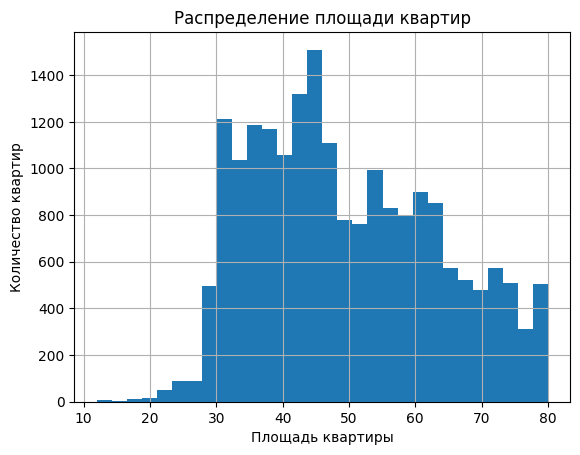

In [111]:
# Строим гистограмму по общей площади, ограничиваем значение по оси х=80. (приблизительно 75 % всех значений)
data['total_area'].hist(bins=30, range=(12,80))
plt.title('Распределение общей площади квартир')
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** Основная часть квартир, судя по графику, имеет площадь от 30 до 50 кв.м, что по площади равно одно и двух-комнатным квартирам. Реже, но тоже часто, встречаются в продаже квартиры от 50 до 80 кв.м (предположительно трехкомнатные) и далее количество больших квартир идет на спад. 

##### жилая площадь

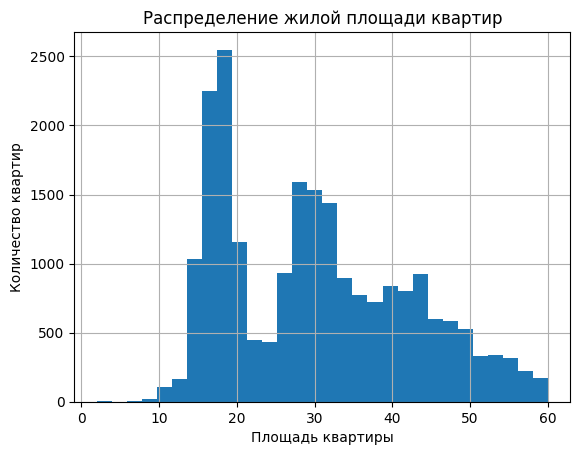

In [112]:
# Строим гистограмму по жилой площади, ограничиваем значение по оси х=60. (приблизительно 75 % всех значений)
data['living_area'].hist(bins=30, range=(2,60))
plt.title('Распределение жилой площади квартир')
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** Подобно и общей площади квартир, мы видим 2 выбивающихся значения: около 18-19 жилых метров и около 30. Этим мы можем подкрепить прошлый вывод по общей площади. Чаще всего на рынке недвижимости втречаются квартиры с 1 или 2 комнатами.

##### площадь кухни

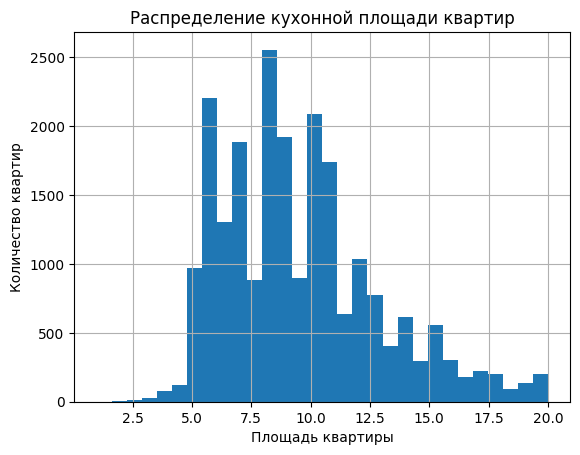

In [113]:
# Строим гистограмму по площади кухни, ограничиваем значение по оси х=20. (приблизительно 75 % всех значений)
data['kitchen_area'].hist(bins=30, range=(1,20))
plt.title('Распределение кухонной площади квартир')
plt.xlabel('Площадь квартиры')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** Площадь кухни чаще всего встречается в диапазоне от 5 до 12-13 квадратных метров. Скорее всего, наблюдаемые "скачки" мы можем наблюдать из-за большого количества типовых квартир.

##### цена объекта

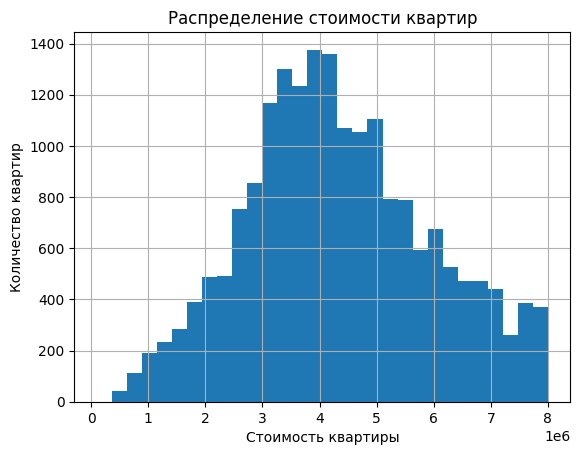

In [114]:
# Строим гистограмму по стоимости, ограничиваем значение по оси х=8000000. (приблизительно 75 % всех значений)
data['last_price'].hist(bins=30, range=(100000,8000000))
plt.title('Распределение стоимости квартир')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** Чаще всего встречаются наиболее распространенные, "простые" квартиры стоимостью 4-5 млн р.

##### количество комнат

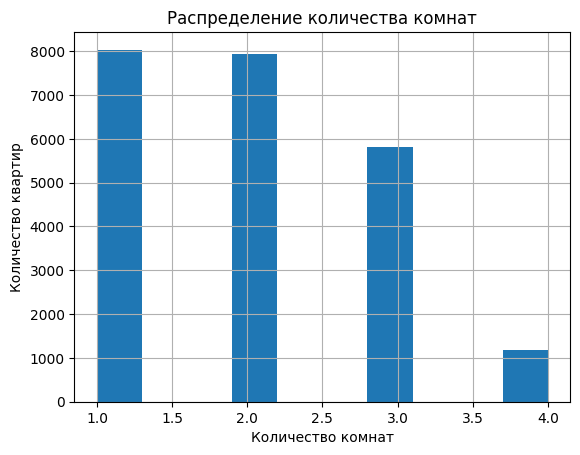

In [115]:
# Строим гистограмму по количеству комнат, ограничиваем значение по оси х=4. (приблизительно 75 % всех значений)
data['rooms'].hist(bins=10, range=(1,4))
plt.title('Распределение количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** Наиболее распространенные, как и предполагалось ранее, квартиры с 1-2 комнатами, реже, но довольно часто встречаются трех-комнатные квартиры и совсем редко встречаются квартиры с 4-мя комнатами

##### высота потолков

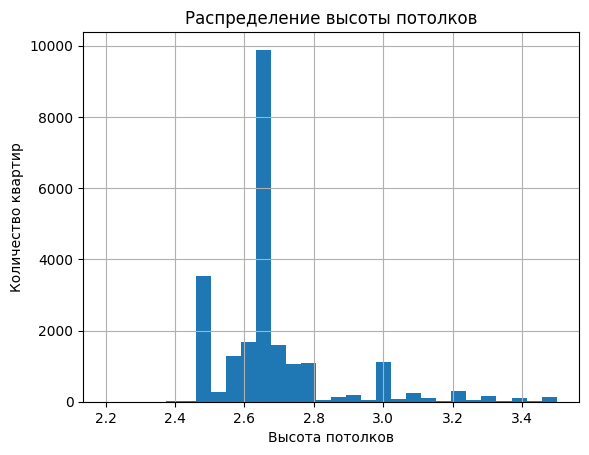

In [116]:
# Строим гистограмму по высоте потолков, ограничиваем значение по оси х=3,5. (приблизительно 75 % всех значений)
data['ceiling_height'].hist(bins=30, range=(2.2,3.5))
plt.title('Распределение высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** Наиболее распространенные квартиры с высотой потолков от 2,5 до 2,8 метров. Больше всего квартир с высотой потолков 2,7 метра.

##### этаж квартиры

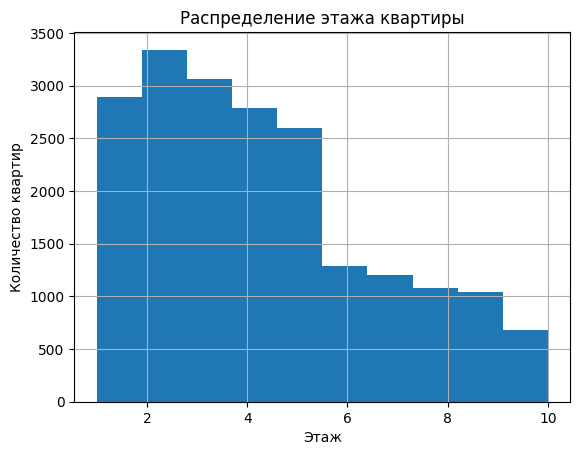

In [117]:
# Строим гистограмму по этажу квартир, ограничиваем значение по оси х=10. (приблизительно 75 % всех значений)
data['floor'].hist(bins=10, range=(1,10))
plt.title('Распределение этажа квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** Hаибольшее число квартир в представленной выборке находятся на втором этаже, в целом в данной выборке чаще всего встречаются квартиры находящиеся на 1-5 этажах, далее все еще часто втречаются квартиры с 6 по 9 этаж, ну и начиная с 10 и выше, количество представленных на рынке квартир равномерно снижается.

##### тип этажа квартиры

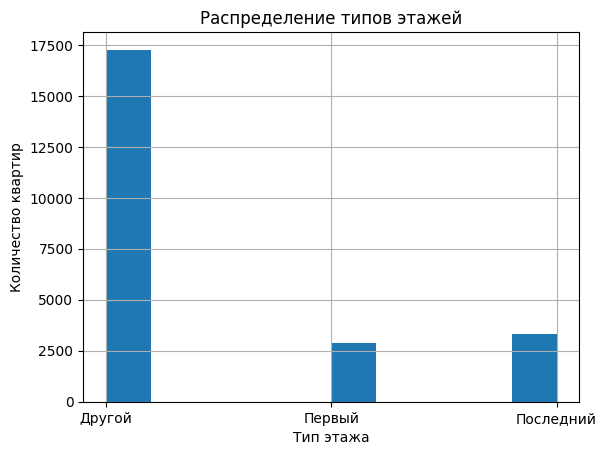

In [118]:
# Строим гистограмму по типу этажей
data['floors_category'].hist()
plt.title('Распределение типов этажей')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** Первый и последний этажи встречаются примерно в 7 раз реже каждый, чем все остальные этажи в выборке.

##### общее количество этажей в доме

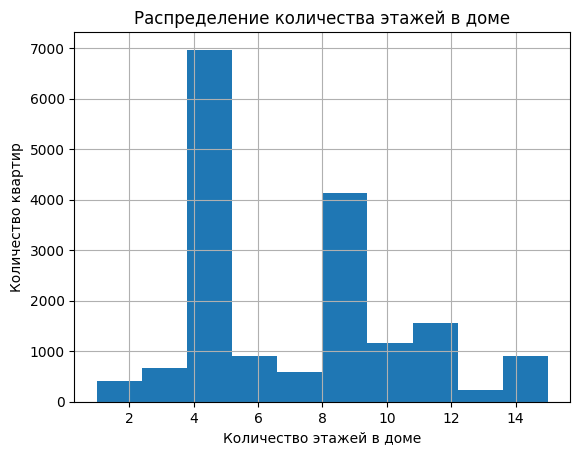

In [120]:
# Строим гистограмму по общему количеству этажей в доме, ограничиваем значение по оси х=15. (приблизительно 75 % всех значений)
data['floors_total'].hist(bins=10, range=(1,15))
plt.title('Распределение количества этажей в доме')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** Наиболее распространены 5-ти и 9-ти этажные дома. Остальные типы домов встречаются заметно реже.

##### расстояние до центра города в метрах

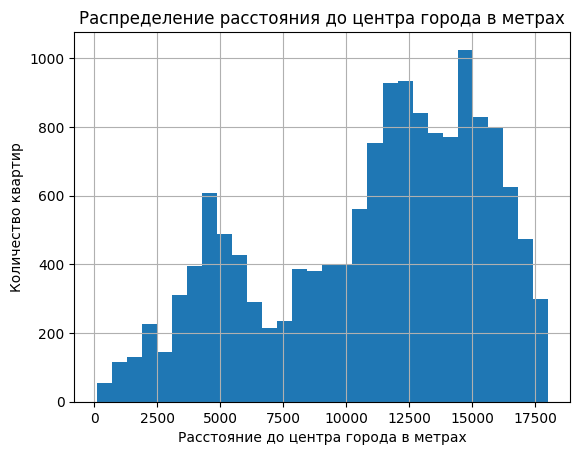

In [121]:
# Строим гистограмму по расстоянию до центра города в метрах, ограничиваем значение по оси х=18000. (приблизительно 75 % всех значений)
data['cityCenters_nearest'].hist(bins=30, range=(100,18000))
plt.title('Распределение расстояния до центра города в метрах')
plt.xlabel('Расстояние до центра города в метрах')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** Основная доля квартир имеет растрояние до центра от 10 000 до 16 000 метров. 

##### расстояние до ближайшего аэропорта

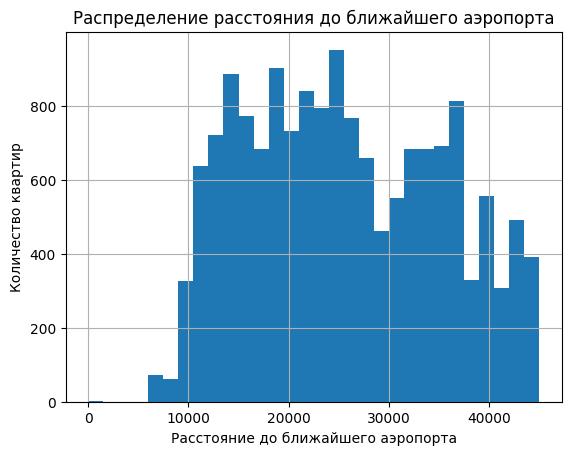

In [122]:
# Строим гистограмму по расстоянию до ближайшего аэропорта в метрах, ограничиваем значение по оси х=45000. (приблизительно 75 % всех значений)
data['airports_nearest'].hist(bins=30, range=(0,45000))
plt.title('Распределение расстояния до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** Основная доля квартир имеет растрояние до ближайшего аэропорта от 10 000 до 28 000 метров. 

##### расстояние до ближайшего парка

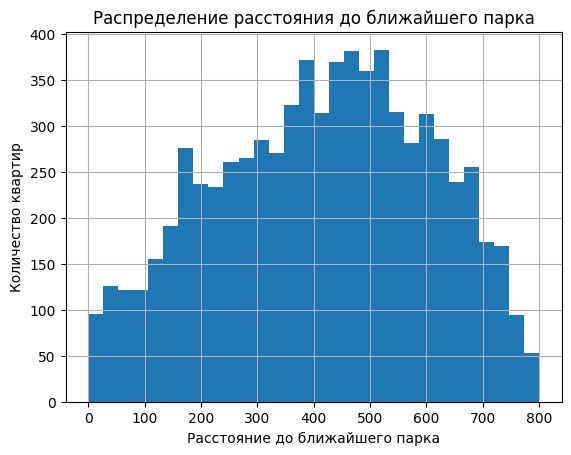

In [123]:
# Строим гистограмму по расстоянию до ближайшего парка в метрах, ограничиваем значение по оси х=45000. (приблизительно 75 % всех значений)
data['parks_nearest'].hist(bins=30, range=(0,800))
plt.title('Распределение расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** Основная доля квартир имеет растрояние до ближайшего парка от 150 до 680 метров.

##### день и месяц публикации объявления

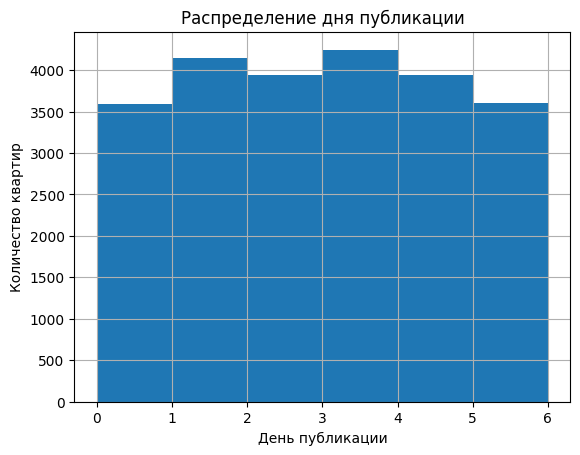

In [131]:
# Строим гистограмму по дням публикации
data['day_of_week'].hist(bins=6)
plt.title('Распределение дня публикации')
plt.xlabel('День публикации')
plt.ylabel('Количество квартир')
plt.show()

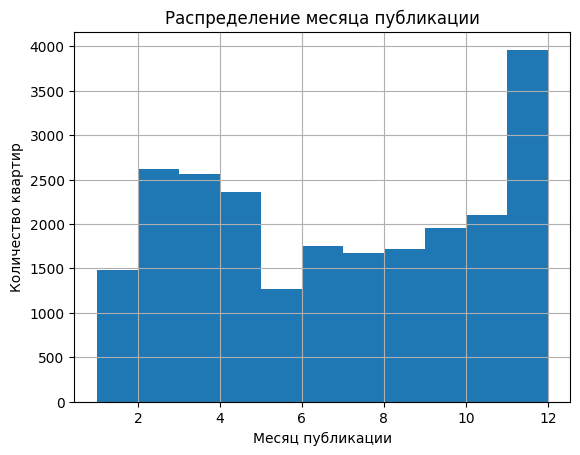

In [132]:
# Строим гистограмму по месяцам публикации
data['month'].hist(bins=11)
plt.title('Распределение месяца публикации')
plt.xlabel('Месяц публикации')
plt.ylabel('Количество квартир')
plt.show()

**Вывод:** Если посмотреть на дни, то мы видим что большая часть объявлений публикуется в рабочие дни. В выходные объявления так же публикуются, но более чем в 2 раза реже, чем в будние дни.

Месяц: По данным в марте мы видим скачок, но до начала лета - в мае, мы видим спад количества объявлений. После июня, с июля и до конца года объявлений становиться все больше и больше и под завершение года к ноябрю мы видим увеличение количества объявлений.

#### Изучение, как быстро продавались квартиры

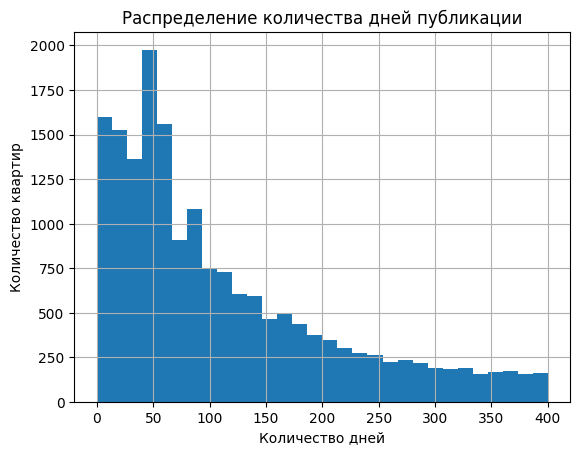

In [134]:
# Строим гистограмму по дням публикации, возьмем ограничение по оси х=400, это немного больше 75% всех значений
data['days_exposition'].hist(bins=30, range=(0,400))
plt.title('Распределение количества дней публикации')
plt.xlabel('Количество дней')
plt.ylabel('Количество квартир')
plt.show()

In [135]:
#Вычисляем среднее и медиальное значениии
data['days_exposition'].describe()

count    20311.000000
mean       181.534144
std        220.120210
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [136]:
data['days_exposition'].value_counts(bins=40).head(10)

(-0.58, 40.475]      4575
(40.475, 79.95]      4355
(79.95, 119.425]     2552
(119.425, 158.9]     1626
(158.9, 198.375]     1310
(198.375, 237.85]     916
(237.85, 277.325]     726
(277.325, 316.8]      587
(316.8, 356.275]      522
(356.275, 395.75]     475
Name: days_exposition, dtype: int64

In [137]:
data['days_exposition'].value_counts(bins=40, ascending=True).head(10)

(1540.525, 1580.0]      3
(1501.05, 1540.525]     3
(1422.1, 1461.575]      5
(1461.575, 1501.05]     5
(1382.625, 1422.1]      6
(1264.2, 1303.675]     13
(1224.725, 1264.2]     13
(1303.675, 1343.15]    14
(1343.15, 1382.625]    16
(1185.25, 1224.725]    20
Name: days_exposition, dtype: int64

**Описание:**

Для того чтобы посчитать среднее и медиальное значении используем метод describe(). 

mean = 190.7 - это среднее значение, 
50% = 103 - это медиальное значение.

Обычно время продажи занимает от 0 до 100 дней. Быстрыми продажами можно считать продажи до 40 дней, если рассматривать необычно долгие продажи то это продажи от 1000 дней.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта

##### Цена и общая площадь

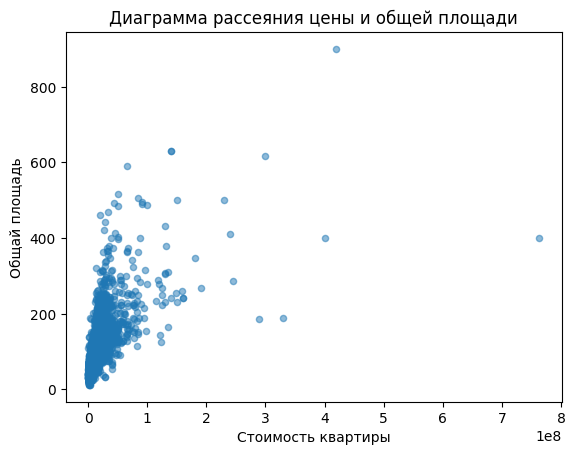

In [139]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.5)
plt.title('Диаграмма рассеяния цены и общей площади')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Общай площадь')
plt.show()

**Вывод:** Есть зависимость стоимости от общей площади квартиры

##### Цена и жилая площадь

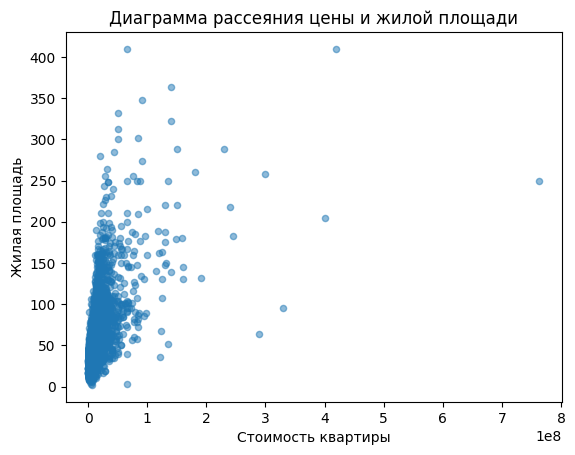

In [140]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.5)
plt.title('Диаграмма рассеяния цены и жилой площади')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Жилая площадь')
plt.show()

**Вывод:** Есть зависимость стоимости от жилой площади квартиры

##### Цена и площадь кухни

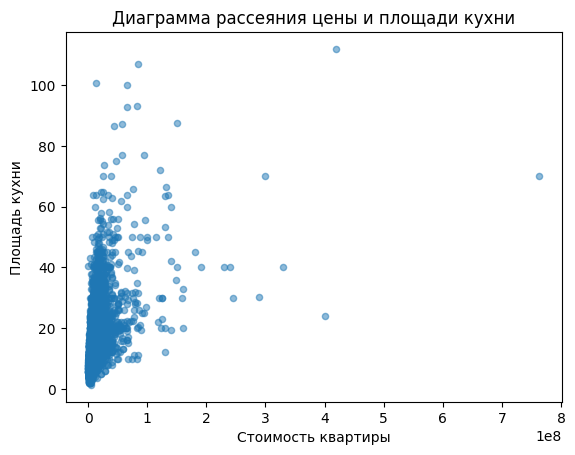

In [141]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.5)
plt.title('Диаграмма рассеяния цены и площади кухни')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Площадь кухни')
plt.show()

**Вывод:** Есть незначительная зависимость стоимости от площади кухни квартиры

##### Цена и количество комнат

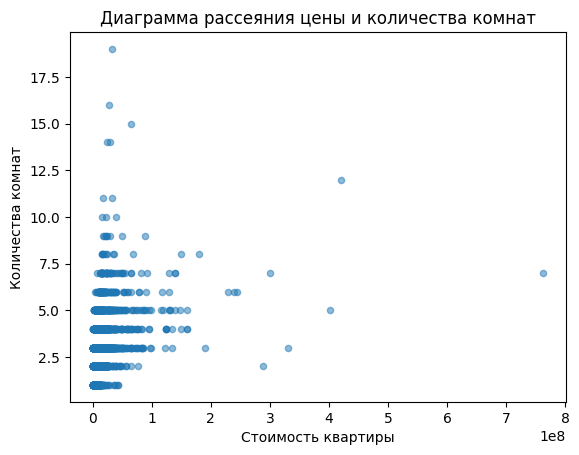

In [142]:
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.5)
plt.title('Диаграмма рассеяния цены и количества комнат')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Количества комнат')
plt.show()

**Вывод:** Есть незначительная зависимость стоимости от количества комнат в квартире

##### Цена и тип этажа, на котором расположена квартира

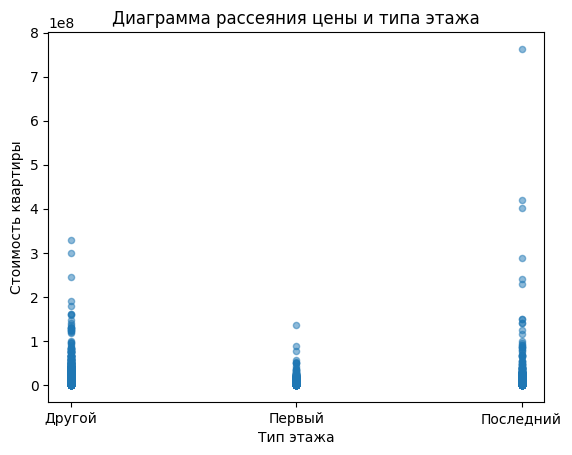

In [145]:
data.plot(x='floors_category', y='last_price', kind='scatter', alpha=0.5)
plt.title('Диаграмма рассеяния цены и типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Стоимость квартиры')
plt.show()

**Вывод:** Зависимость стоимости от типа этажа, на котором расположена квартира не выявлено.

##### Цена и даты размещения

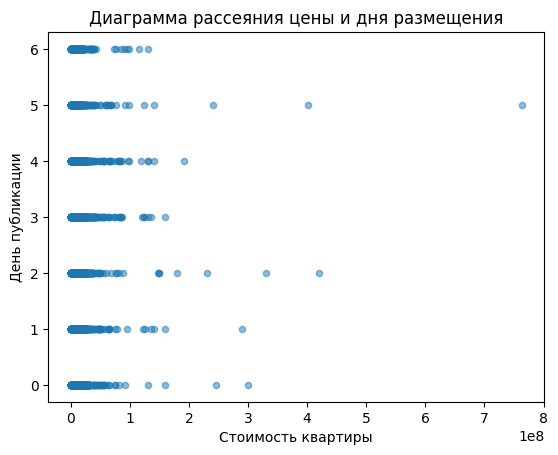

In [148]:
data.plot(x='last_price', y='day_of_week', kind='scatter', alpha=0.5)
plt.title('Диаграмма рассеяния цены и дня размещения')
plt.xlabel('Стоимость квартиры')
plt.ylabel('День публикации')
plt.show()

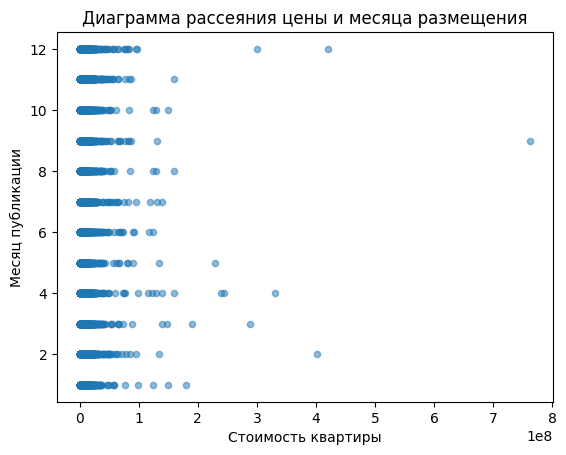

In [149]:
data.plot(x='last_price', y='month', kind='scatter', alpha=0.5)
plt.title('Диаграмма рассеяния цены и месяца размещения')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Месяц публикации')
plt.show()

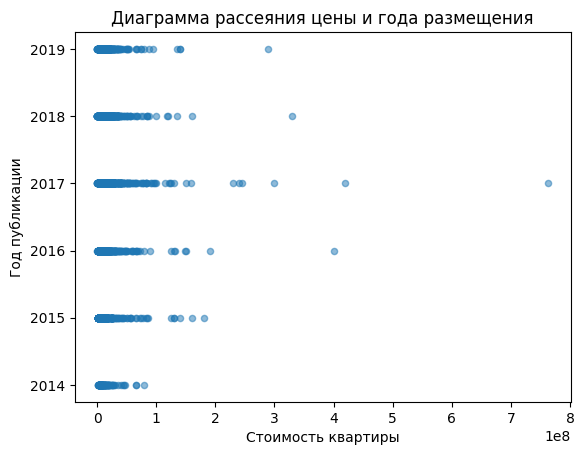

In [150]:
data.plot(x='last_price', y='year', kind='scatter', alpha=0.5)
plt.title('Диаграмма рассеяния цены и года размещения')
plt.xlabel('Стоимость квартиры')
plt.ylabel('Год публикации')
plt.show()

**Вывод:** Корреляция стоимости от даты размещения отсутствует

#### Подсчет средней цены одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [151]:
#среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
top10_list=data['locality_name'].value_counts().head(10).reset_index().iloc[:, 0].to_list()
(data.query('locality_name in @top10_list')
     .pivot_table(index='locality_name', values='price_square_meter', aggfunc = 'mean')
     .sort_values(by='price_square_meter', ascending=False).round()
).reset_index()

,locality_name,price_square_meter
0,Санкт-Петербург,114688.0
1,Пушкин,103126.0
2,деревня Кудрово,92297.0
3,поселок Парголово,90290.0
4,поселок Мурино,85004.0
5,поселок Шушары,78406.0
6,Колпино,75425.0
7,Гатчина,68746.0
8,Всеволожск,68684.0
9,Выборг,58238.0


**Вывод:** Самая высокая цена в Санкт-Петербурге, самая низкая в Всеволожске.

#### Подсчет средней стоимости растояния от центра города в Санкт-Петербурге, в километрах

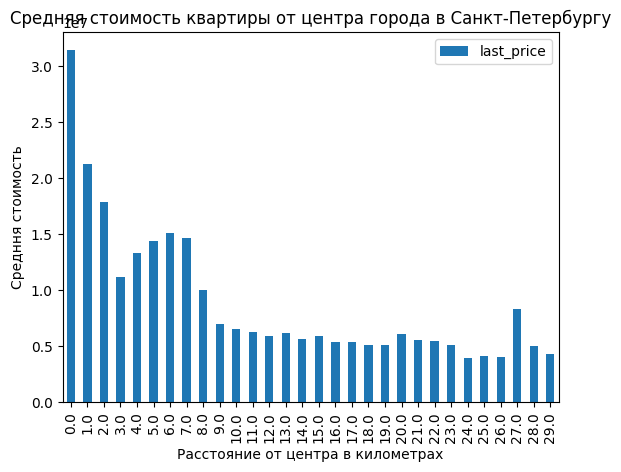

In [152]:
(data.query('locality_name == "Санкт-Петербург"')
     .pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc = 'mean')
     .plot.bar()
)
plt.title('Средняя стоимость квартиры от центра города в Санкт-Петербургу')
plt.xlabel('Расстояние от центра в километрах')
plt.ylabel('Средння стоимость')
plt.show()

**Вывод:** Стоимость жилья напрямую зависит от расстояния до центра города. На графике, после 7 км заметно, что цена меняется. Это возможный центр города. Есть незначительные колибания в зависимости, но в целом общая тенденция сохраняется.

### Общий вывод

При выполнении анализа в первую очередь был изучен файл с данными.

При изучении данных выяснилось, что данные нуждаются в преобработке для более корректных подсчетов.
1. Были заменены значения там где это можно было сделать по смыслу, остальные пропуски были оставлены так как нет очевидной замены для них.
2. При работе с пропусками было установлено, что основная причина пропусков, не корректное заполнение объявления, и отсутствие маски ввода на сайте.
3. Следующим шагом было изучить тип данных, и скорректировать тип данных там где это необходимо, по некоторым столбцам перевел тип данных с вещественных чисел в целые числа, а так же перевел столбец дата публикации в формат дататайм.
4. Избавился от неявных дубликатов и аномальных и выбивающихся значений.

Далее были добавлены новые столбцы в датафрейм (цена одного квадратного метра, день недели публикации объявления, месяц публикации объявления, год публикации объявления, тип этажа квартиры, расстояние до центра города в километрах)

Был произведен исследовательский анализ данных по следующим параметрам объектов: 
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
этаж квартиры;
тип этажа квартиры;
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;
день и месяц публикации объявления.

При анализе скорости продажи квартиры были получены следующие результаты: среднее значение - 190.7, медиальное значение - 103.
Обычно время продажи занимает от 0 до 100 дней. Быстрыми продажами можно считать продажи до 40 дней, если рассматривать необычно долгие продажи то это продажи от 1000 дней.

При изучении факторов влияющих на стоимость объекта, было выявлено, что на стоимость влиют общая плошадь квартиры и жилая площадь квартиры. По остальным факторам влияния не выявлено.

Была посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Самая высокая цена в Санкт-Петербурге, самая низкая в Всеволожске.

Была выщитана средняя стоимость каждого километра до центра города.
Стоимость жилья напрямую зависит от расстояния до центра города. Есть незначитель колибания в зависимости, но в целом общая тенденция сохраняется.

**Резюмируя полученные выводы, можно сказать, что основная доля объявлений приходиться на Санкт-Петербруг, где стоимость жилья  отличается от региона. Основные факторы влияющие на цену объявления это общая площадь и расстояниие до центра города.**

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод